# Traffic Sign Recognition Classifier

In this project, it will use German Traffic Sign Dataset as dataset.

## Step 1:Load the data

In [44]:
# Load pickled data
import pickle

training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Analyze the dataset such as its size and the shape of the images.

In [3]:
n_train = len(y_train)
n_validation = len(y_valid)
n_test = len(y_test)

image_shape = X_train[0].shape
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualize the dataset

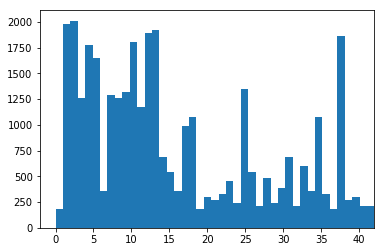

31


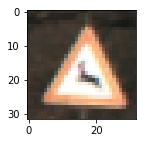

In [10]:
import matplotlib.pyplot as plt
plt.hist(y_train, bins = n_classes)
plt.xlim(xmax=n_classes-1)
plt.show()

index=840
image = X_train[index].squeeze()
plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

## Step 2: Design and Test a Model Architecture

### Preprocess the dataset by grayscaling and normalizing the images

31


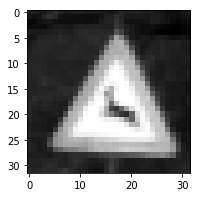

In [45]:
import numpy as np
import cv2

def Process(images):
    list_img = []
    for img in images:
        gray = np.expand_dims(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY),2)
        gray=(gray-np.mean(gray))/np.std(gray)
        list_img.append(gray)
    return list_img

X_train = Process(X_train)
X_valid = Process(X_valid)
X_test = Process(X_test)
index=840
image = X_train[index].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image,cmap="gray")
print(y_train[index])

### Model Architecture

In [29]:
from  tensorflow.contrib.layers import flatten
def Inference(x,num_class):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Convolutional Layer. Input = 32x32x1. Output = 32x32x12
    conv0_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 12), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros([12]))
    conv0 = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='SAME') + conv0_b
    conv0 = tf.nn.relu(conv0)

    # Convolutional Layer. Input = 32x32x12. Output = 32x32x12.
    conv5x5_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 12), mean = mu, stddev = sigma))
    conv5x5_b = tf.Variable(tf.zeros([12]))
    conv5x5 = tf.nn.conv2d(conv0, conv5x5_W, strides=[1, 1, 1, 1], padding='SAME') + conv5x5_b
    conv5x5 = tf.nn.relu(conv5x5)
    
    # Convolutional Layer. Input = 32x32x12. Output = 32x32x12.
    conv3x3_W = tf.Variable(tf.truncated_normal(shape=(3,3, 12, 12), mean = mu, stddev = sigma))
    conv3x3_b = tf.Variable(tf.zeros([12]))
    conv3x3 = tf.nn.conv2d(conv0, conv3x3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3x3_b
    conv3x3 = tf.nn.relu(conv3x3)
    
    # Convolutional Layer. Input = 32x32x12. Output = 32x32x12.
    conv1x1_W = tf.Variable(tf.truncated_normal(shape=(1,1, 12, 12), mean = mu, stddev = sigma))
    conv1x1_b = tf.Variable(tf.zeros([12]))
    conv1x1 = tf.nn.conv2d(conv0, conv1x1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1x1_b
    conv1x1 = tf.nn.relu(conv1x1)
    
    # AVG Pooling. Input = 32x32x12. Output = 32x32x12.
    conv_pool = tf.nn.avg_pool(conv0, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
    
    # Concat Layer. Output = 32x32*48
    conv_inc = tf.concat(3,[conv5x5,conv3x3,conv1x1,conv_pool])
    conv_inc = tf.nn.relu(conv_inc)
    
    # Convolutional Layer. Input = 32x32x48. Output = 28x28x48.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 48, 48), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros([48]))
    conv1 = tf.nn.conv2d(conv_inc, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    # Max Pooling. Input = 28x28x48. Output = 14x14x48.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Convolutional Layer. Output = 10x10x96.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 48, 96), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros([96]))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # Max Pooling. Input = 10x10x96. Output = 5x5x96.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Convolutional Layer. Input = 5x5x96. Output = 3x3x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros([128]))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    
    # Max Pooling. Input = 3x3x128. Output = 2x2x128
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
    
    # Flatten. Input = 2x2x128. Output = 512.
    fc1 = flatten(conv3)
    
    # Fully Connected. Input = 512. Output = 120.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(512 , 120), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros([120]))
    fc2 = tf.matmul(fc1, fc2_W)+fc2_b
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,keep_prob=0.5)
    # Fully Connected. Input = 120. Output = num_class.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(120, num_class), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros([num_class]))
    logits = tf.matmul(fc2, fc3_W)+fc3_b

    
    return logits

### Train, Validate and Test the Model

In [30]:
import tensorflow as tf
from sklearn.utils import shuffle

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
y_one_hot = tf.one_hot(y, n_classes)
logits = Inference(x,n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y_one_hot)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

EPOCHS = 30
BATCH_SIZE = 128

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        train_accuracy = evaluate(X_train, y_train)     
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        saver.save(sess, './model/model.ckpt',global_step=i)
    
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.845
Validation Accuracy = 0.794

EPOCH 2 ...
Train Accuracy = 0.940
Validation Accuracy = 0.886

EPOCH 3 ...
Train Accuracy = 0.969
Validation Accuracy = 0.926

EPOCH 4 ...
Train Accuracy = 0.974
Validation Accuracy = 0.933

EPOCH 5 ...
Train Accuracy = 0.983
Validation Accuracy = 0.951

EPOCH 6 ...
Train Accuracy = 0.986
Validation Accuracy = 0.959

EPOCH 7 ...
Train Accuracy = 0.986
Validation Accuracy = 0.960

EPOCH 8 ...
Train Accuracy = 0.992
Validation Accuracy = 0.965

EPOCH 9 ...
Train Accuracy = 0.993
Validation Accuracy = 0.968

EPOCH 10 ...
Train Accuracy = 0.994
Validation Accuracy = 0.967

EPOCH 11 ...
Train Accuracy = 0.995
Validation Accuracy = 0.971

EPOCH 12 ...
Train Accuracy = 0.990
Validation Accuracy = 0.963

EPOCH 13 ...
Train Accuracy = 0.993
Validation Accuracy = 0.961

EPOCH 14 ...
Train Accuracy = 0.994
Validation Accuracy = 0.970

EPOCH 15 ...
Train Accuracy = 0.995
Validation Accuracy = 0.975

EPOCH 16 ...
Train Ac

When EPOCH is 29, the Validation Accuray reaches the highest. So the model of EPOCH 29 is used on test set.

In [31]:
with tf.Session() as sess:
    saver.restore(sess, './model/model.ckpt-29')
    test_accuracy = evaluate(X_test, y_test)
    print('Test Accuracy: {:.3f}'.format(test_accuracy))

Test Accuracy: 0.957


## Step 3: Test a Model on New Images

I download some pictures of German traffic signs from the web and use the model to predict the traffic sign type. The document "signnames.csv" contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

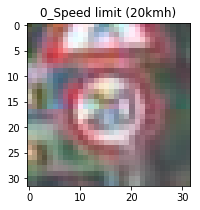

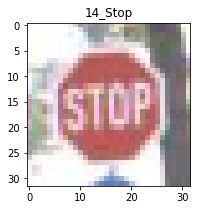

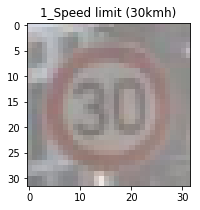

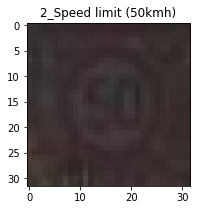

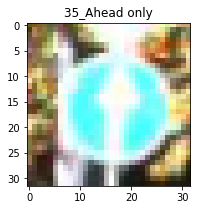

In [38]:
from PIL import Image
import os
names=[]
path="./images/"
files=os.listdir(path)
images=[]
labels=[]
i=0
for file in files:
    label = file.split('_')[0]
    labels.append(label)
    name=file.split('.')[0]
    data_dir = os.path.join(path, file)
    img = Image.open(data_dir)
    new=os.path.join(path, name+".jpg")
    img.save(new)
    img_jpg =  cv2.cvtColor(cv2.imread(new), cv2.COLOR_BGR2RGB)
    img_jpg = cv2.resize(img_jpg, (32, 32)) 
    images.append(img_jpg)
    plt.figure(figsize=(3,3))
    plt.imshow(img_jpg)
    plt.title(name) 
# Preprocess the Images
images=Process(images)

### Analyze Performance

In [40]:
with tf.Session() as sess:
    saver.restore(sess, './model/model.ckpt-29')

    test_accuracy = evaluate(images, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [42]:
with tf.Session() as sess:
    saver.restore(sess, './model/model.ckpt-29')
    top_5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x:images})
    for i in range(len(images)):
        format_str = ('Image:%d, label:%s, prediction:%s,probability:%s \n')
        print (format_str % (i, labels[i], top_5.indices[i],top_5.values[i]))

Image:0, label:0, prediction:[ 0 32 26 17 25],probability:[  9.99941587e-01   2.72687103e-05   7.07244908e-06   6.39915197e-06
   6.08015625e-06] 

Image:1, label:14, prediction:[14 15 12 33 13],probability:[  1.00000000e+00   1.94081506e-09   1.82484652e-11   4.66862486e-12
   2.27778538e-12] 

Image:2, label:1, prediction:[ 1 40  5  7  2],probability:[  1.00000000e+00   1.17127099e-21   1.38450591e-24   6.08187536e-30
   5.13098509e-34] 

Image:3, label:2, prediction:[ 2  3 34  1  5],probability:[  1.00000000e+00   6.66787666e-21   4.45562365e-23   4.01684941e-25
   9.99810805e-28] 

Image:4, label:35, prediction:[35 15 13 12 34],probability:[  9.99238729e-01   5.07587334e-04   2.23201219e-04   2.75284001e-05
   2.34276058e-06] 

